# Geometric Transformations

## Translation, Rotation, Scaling, and Affine Transformations

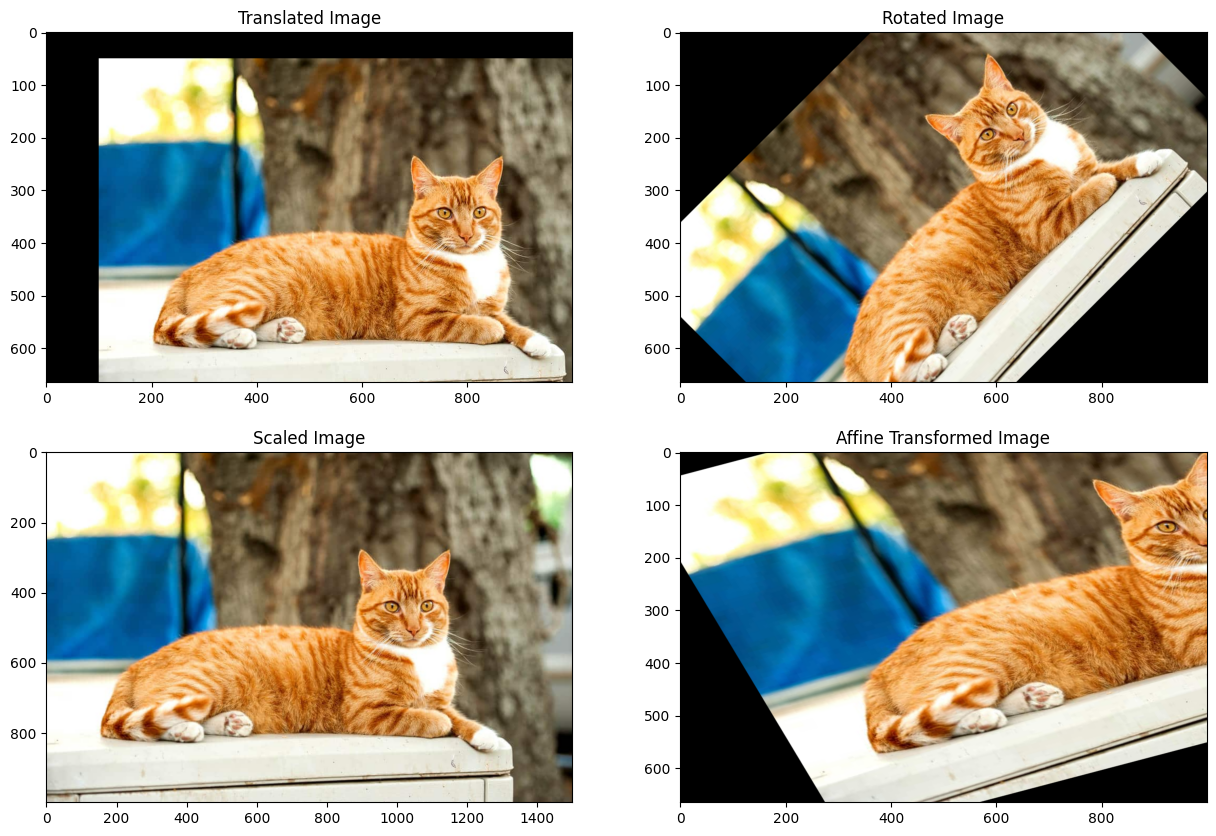

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read an image
image = cv2.imread('example.jpg')

# Translation
tx, ty = 100, 50  # Translation values
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# Rotation
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Affine Transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_image = cv2.warpAffine(image, affine_matrix, (w, h))

# Display the results
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(affine_image, cv2.COLOR_BGR2RGB))
plt.title('Affine Transformed Image')

plt.show()


## Perspective Transformation

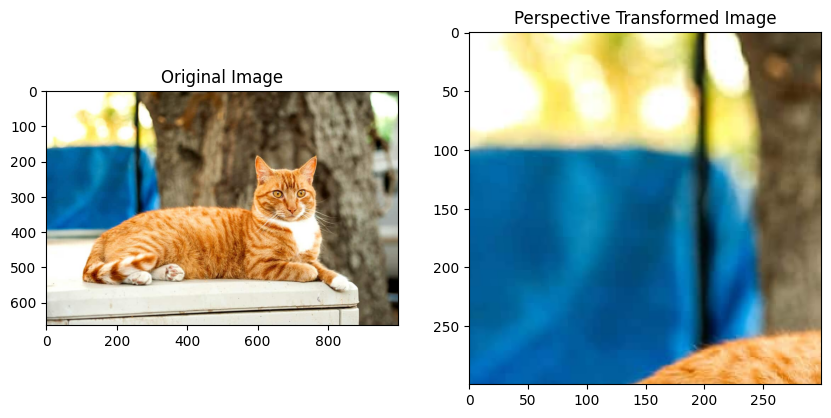

In [10]:
# Define points for perspective transformation
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# Get the perspective transformation matrix
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_image = cv2.warpPerspective(image, perspective_matrix, (300, 300))

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(perspective_image, cv2.COLOR_BGR2RGB))
plt.title('Perspective Transformed Image')

plt.show()


# Thresholding and Binarization

## Simple and Adaptive Thresholding

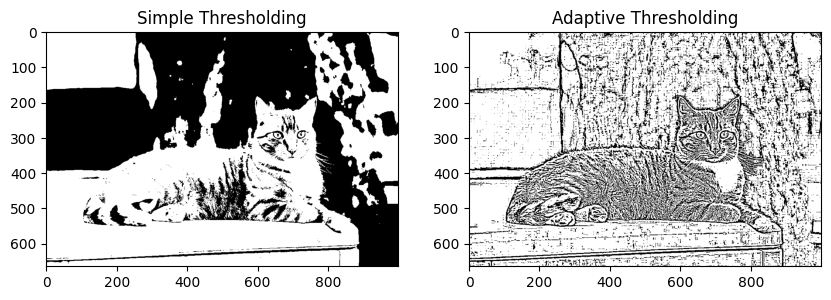

In [11]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simple thresholding
_, simple_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(simple_thresh, cmap='gray')
plt.title('Simple Thresholding')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()


## Otsu’s Binarization

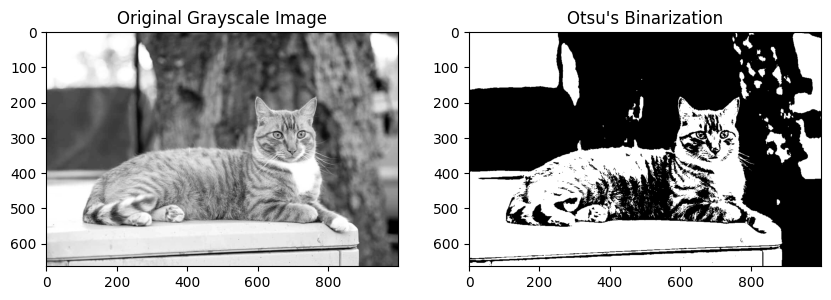

In [12]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Otsu's binarization
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu\'s Binarization')

plt.show()


# Morphological Operations

## Erosion, Dilation, Opening, Closing

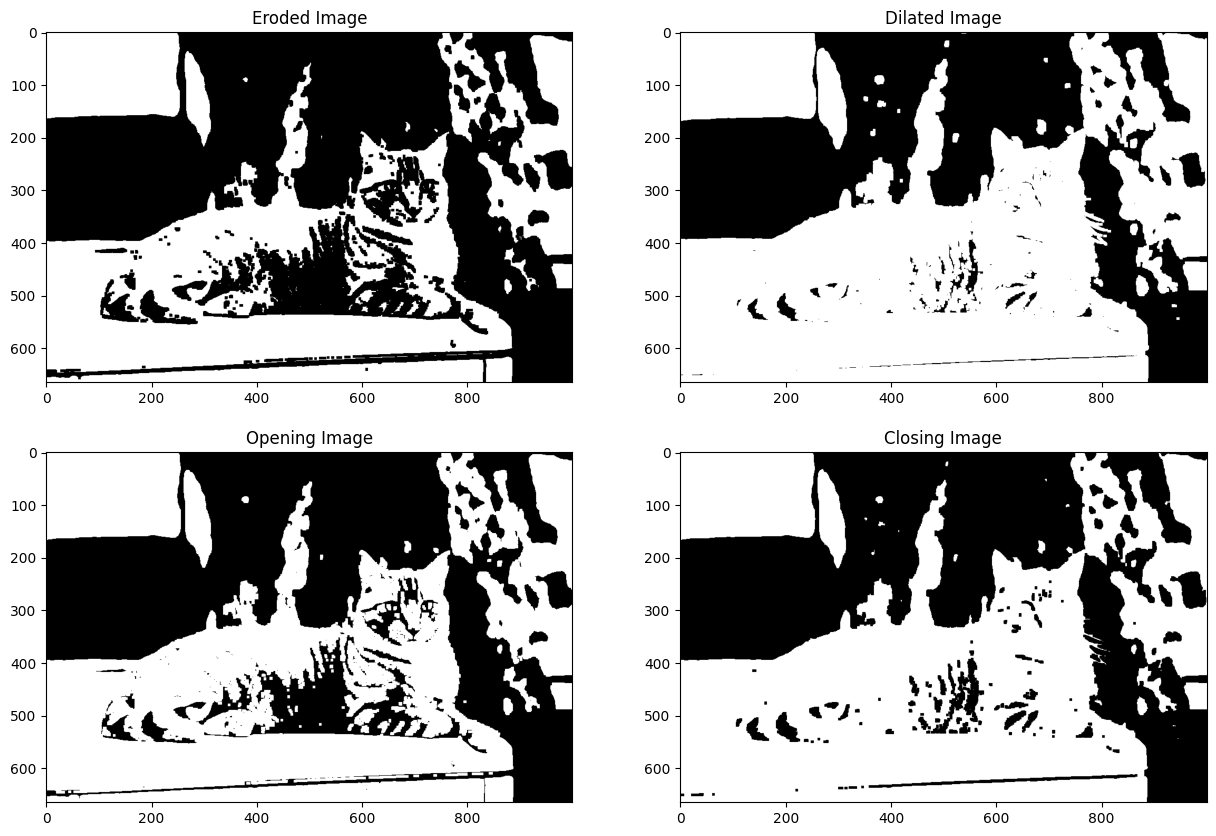

In [13]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Opening (erosion followed by dilation)
opening_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
closing_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(2, 2, 3)
plt.imshow(opening_image, cmap='gray')
plt.title('Opening Image')

plt.subplot(2, 2, 4)
plt.imshow(closing_image, cmap='gray')
plt.title('Closing Image')

plt.show()


## Morphological Gradient, Top Hat, Black Hat

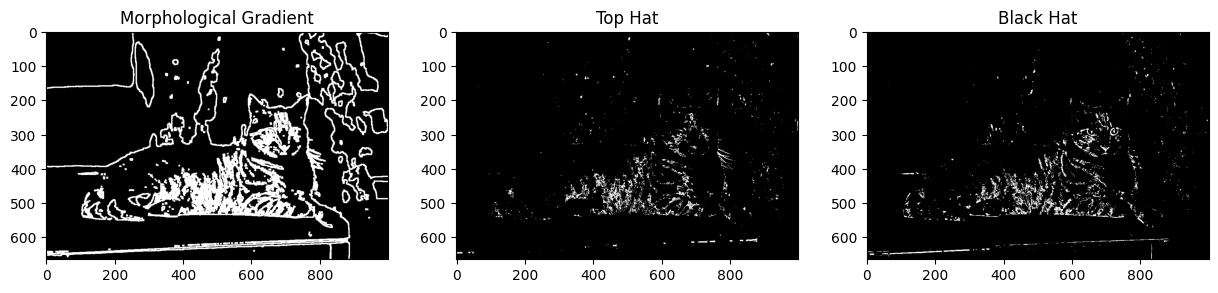

In [14]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Morphological Gradient
morph_gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)

# Top Hat
top_hat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)

# Black Hat
black_hat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(morph_gradient, cmap='gray')
plt.title('Morphological Gradient')

plt.subplot(1, 3, 2)
plt.imshow(top_hat, cmap='gray')
plt.title('Top Hat')

plt.subplot(1, 3, 3)
plt.imshow(black_hat, cmap='gray')
plt.title('Black Hat')

plt.show()


# Contours and Shape Detection

## Finding and Drawing Contours

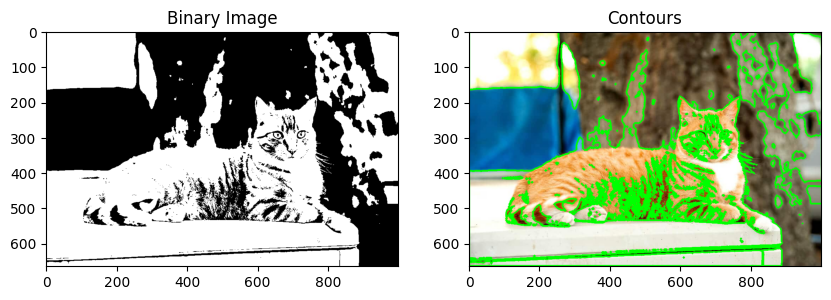

In [15]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')

plt.show()


## Shape Analysis and Properties

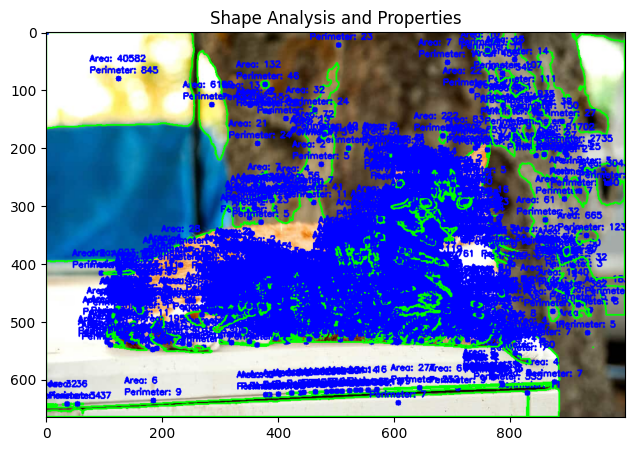

In [16]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and analyze shapes
shape_analysis_image = image.copy()
for contour in contours:
    # Calculate moments
    M = cv2.moments(contour)

    # Calculate centroid
    if M['m00'] != 0:
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])
    else:
        cX, cY = 0, 0

    # Calculate area
    area = cv2.contourArea(contour)

    # Calculate perimeter
    perimeter = cv2.arcLength(contour, True)

    # Draw contour and centroid
    cv2.drawContours(shape_analysis_image, [contour], -1, (0, 255, 0), 2)
    cv2.circle(shape_analysis_image, (cX, cY), 5, (255, 0, 0), -1)

    # Annotate the image with area and perimeter
    cv2.putText(shape_analysis_image, f"Area: {int(area)}", (cX - 50, cY - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.putText(shape_analysis_image, f"Perimeter: {int(perimeter)}", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(shape_analysis_image, cv2.COLOR_BGR2RGB))
plt.title('Shape Analysis and Properties')
plt.show()
